In [109]:
import pickle
import os
import numpy as np
import datetime as dt
import vis_methods as vs
import env_methods as em

In [110]:
main_path = r'C:\Users\bpara\Geo data'

flood_time_series = os.path.join(main_path, "time series result")

In [111]:
with open(flood_time_series, "rb") as f:
    flood_data = pickle.load(f)
    
with open("mississippi points list", "rb") as f:
    river_points = pickle.load(f)

In [112]:
def geo_corr(dataset, datakey, lat_i_1, lon_i_1, lat_i_2, lon_i_2):
    t_1 = dt.datetime.now()
    if(dataset[datakey][lat_i_2][lon_i_2][datakey] == None): return np.nan
    return np.corrcoef(dataset[datakey][lat_i_1][lon_i_1][datakey],dataset[datakey][lat_i_2][lon_i_2][datakey])[0,1]

In [113]:
def geo_corr_map(dataset, datakey, lat_i, lon_i):
    result = dict()
    result["lon"] = dataset["lon"]
    result["lat"] = dataset["lat"]
    result["pearson"] = []
    
    t1 = dt.datetime.now()
    for lat in range(len(dataset["lat"])):
        row = []
        for lon in range(len(dataset["lon"])):
            row.append(geo_corr(dataset, datakey, lat_i, lon_i, lat, lon))
        result["pearson"].append(row)
    t2 = dt.datetime.now()
    print("completed in " + str(t2 - t1))
        
    return result

In [114]:
#this replaces every value not at a point in the trimmed rivers data set with NaN so it won't be graphed by matplotlib
def trim_to_river(river_points, data, datakey):
    t1 = dt.datetime.now()
    result = data.copy()
    for lat_i in range(len(result["lat"])):
        for lon_i in range(len(result["lon"])):
            point = (round(data["lon"][lon_i],2), round(result["lat"][lat_i], 2))
            if point not in river_points:
                result[datakey][lat_i][lon_i] = np.nan
    print("Done in " + str(dt.datetime.now() - t1))
    return result

In [115]:
lat = 38.6270
lon = -90.1994

corr = geo_corr_map(flood_data, "count", em.find_closest_val(lat, flood_data["lat"]), em.find_closest_val(lon, flood_data["lon"]))

completed in 0:00:12.441070


0
223


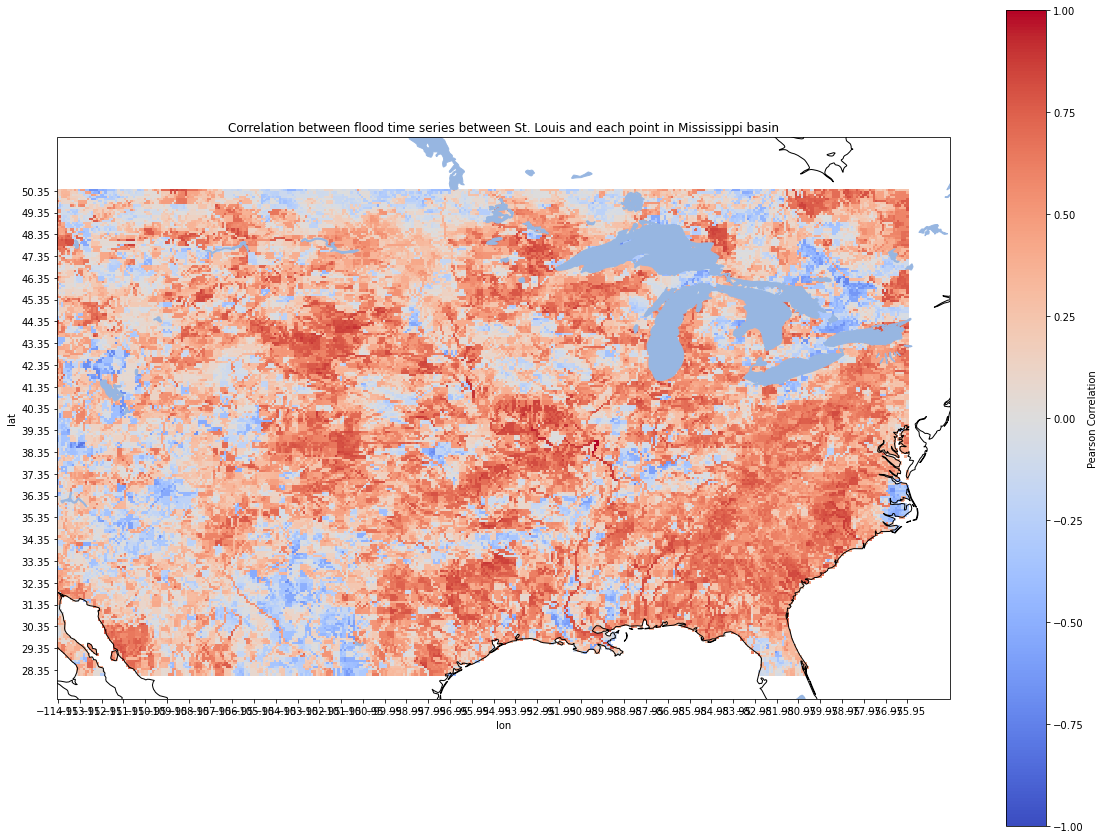

In [116]:
vs.plot_data(corr["lon"], corr["lat"], np.asarray(corr["pearson"]), "Pearson Correlation", "Correlation between flood time series between St. Louis and each point in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1, has_rivers = False)

In [117]:
corr_trimmed = trim_to_river(river_points, corr.copy(), "pearson")

Done in 0:00:17.202140


0
223


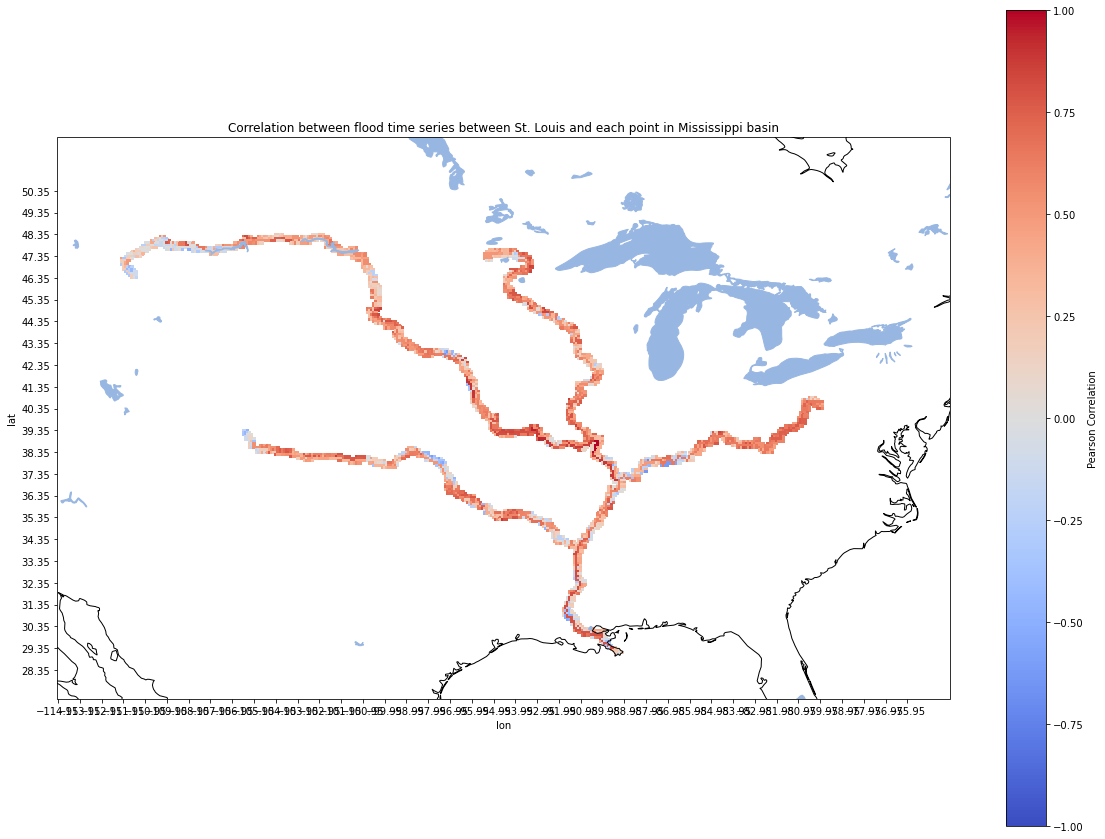

In [118]:
vs.plot_data(corr_trimmed["lon"], corr_trimmed["lat"], np.asarray(corr_trimmed["pearson"]), "Pearson Correlation", "Correlation between flood time series between St. Louis and each point in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1, has_rivers = False)